In [1]:
import os  
import cv2  
import random  
import numpy as np  
import matplotlib.pyplot as plt  

from tools.format_images import center_crop, resize  

In [2]:
def show_one_sample(target_dir):
    final_images = []  
    for concept in os.listdir(target_dir):  
        if not os.path.isdir(os.path.join(target_dir, concept)):  
            continue
        image_path = os.path.join(target_dir, concept)
        if "v0" in os.listdir(image_path):
            image_path = os.path.join(image_path, "v0")
        filename = random.choice(os.listdir(image_path))
        image = cv2.imread(os.path.join(image_path, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = center_crop(image)
        image = resize(image)
        final_images.append(image)

    k = 5
    if len(final_images) == 0:
        print("No images found!")
    else:
        img_h, img_w, img_c = final_images[0].shape  # 獲取圖片尺寸
        black_img = np.zeros((img_h, img_w, img_c), dtype=np.uint8)  # 黑色圖片  

        rows = []
        for i in range(0, len(final_images), k):
            row_images = final_images[i:i+k]
            while len(row_images) < k:  # 補足 k 張圖片
                row_images.append(black_img)
            row = np.concatenate(row_images, axis=1)  # 橫向拼接 k 張圖片
            rows.append(row)

        final_image = np.concatenate(rows, axis=0)  # 縱向拼接所有行  

        plt.figure(figsize=(20, 20))  
        plt.axis('off')  
        plt.imshow(final_image)  
        plt.show()

In [3]:
def show_all_sample(target_dir):
    final_rows = []  
    max_width = 0  # 記錄最寬的 concept 行

    for concept in os.listdir(target_dir):  
        concept_path = os.path.join(target_dir, concept)
        if not os.path.isdir(concept_path):  
            continue  

        # 若資料夾內有 "v0"，則進入該資料夾
        if "v0" in os.listdir(concept_path):  
            concept_path = os.path.join(concept_path, "v0")  

        images = []  
        for filename in os.listdir(concept_path):  
            image = cv2.imread(os.path.join(concept_path, filename))
            if image is None:
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = center_crop(image)
            image = resize(image)
            images.append(image)
        images = images[:8]  # 只取前 8 張圖片

        if len(images) == 0:
            continue  

        # 確保所有圖片尺寸一致  
        img_h, img_w, img_c = images[0].shape  
        black_img = np.zeros((img_h, img_w, img_c), dtype=np.uint8)  

        # 每個 concept 的圖片合併成一行
        concept_row = np.concatenate(images, axis=1)  
        final_rows.append(concept_row)

        # 更新最大寬度
        max_width = max(max_width, concept_row.shape[1])

    # **填充所有行到相同的寬度**
    for i in range(len(final_rows)):
        row_h, row_w, row_c = final_rows[i].shape  
        if row_w < max_width:  # 若寬度不足，則補上黑色區域
            pad_width = max_width - row_w
            padding = np.zeros((row_h, pad_width, row_c), dtype=np.uint8)
            final_rows[i] = np.concatenate([final_rows[i], padding], axis=1)

    # **最終拼接所有行**
    if len(final_rows) > 0:
        final_image = np.concatenate(final_rows, axis=0)  
        plt.figure(figsize=(50, 50))  
        plt.axis('off')  
        plt.imshow(final_image)  
        plt.show()  
    else:
        print("No images found!")

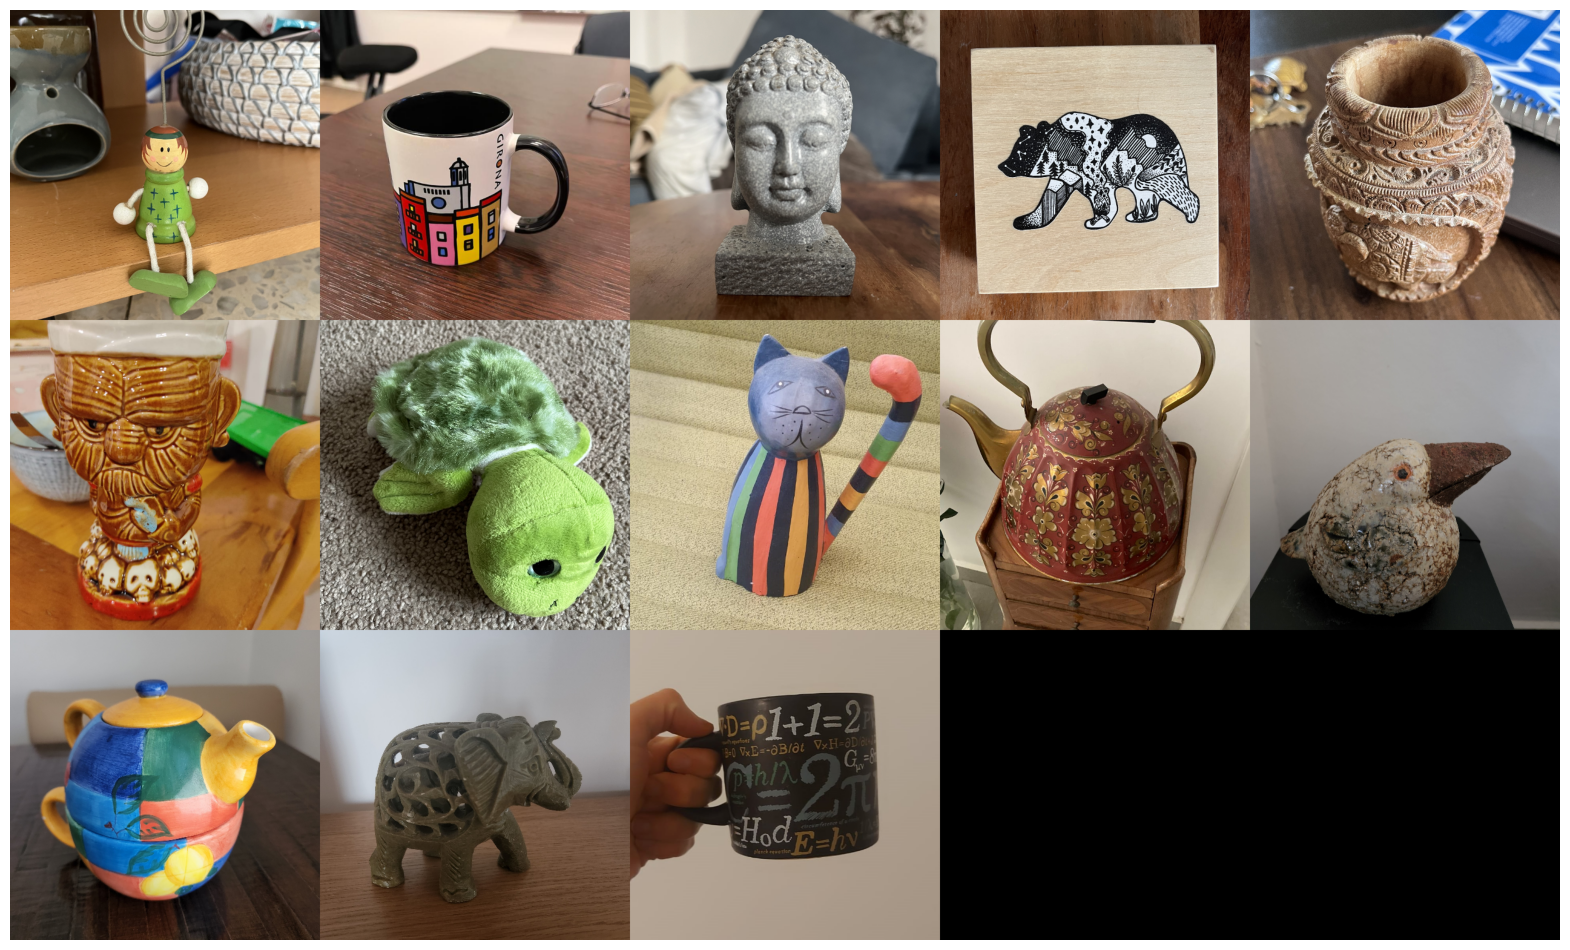

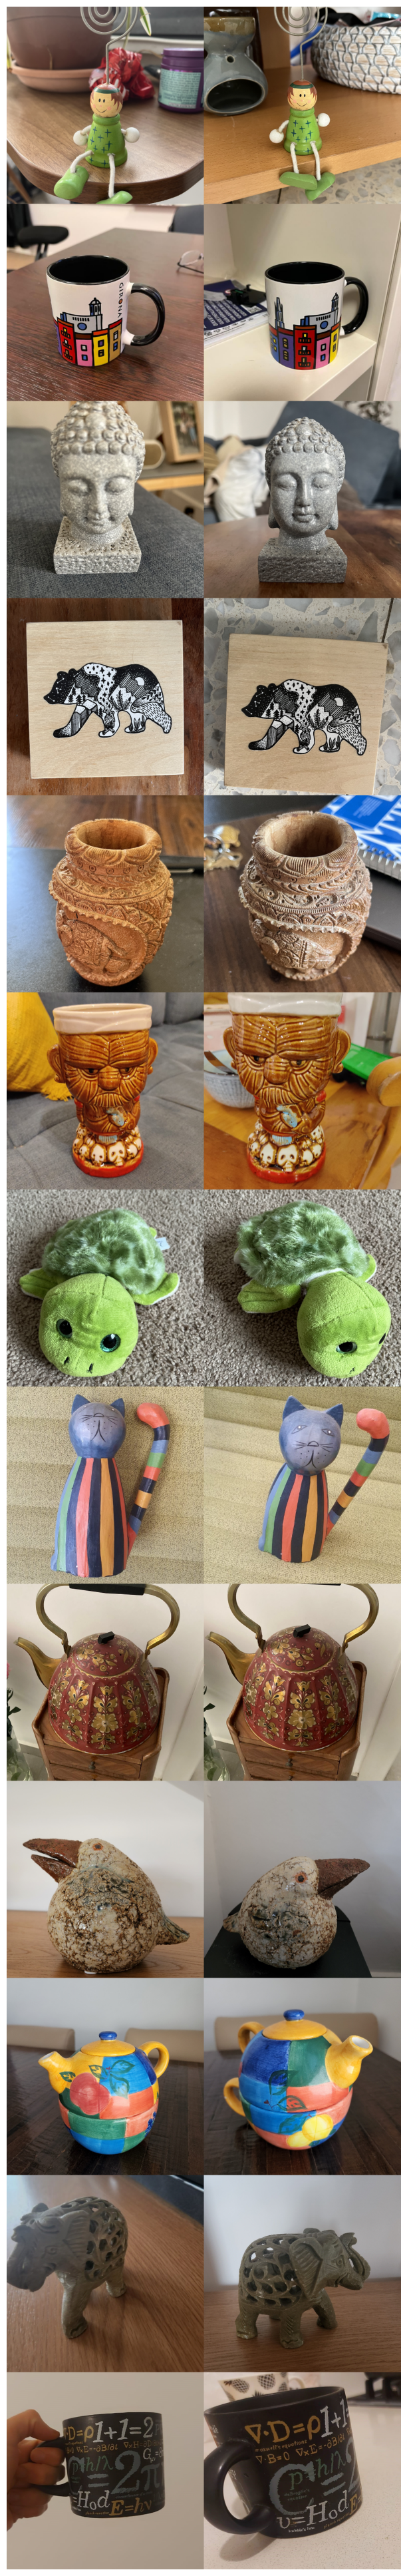

In [4]:
# target_dir = "/home/jack/Code/Research/textual_inversion_data"
# target_dir = "/home/jack/Code/Research/dreambooth/dataset"
# target_dir = "/home/jack/Code/Research/instree_main/datasets"
target_dir = "/home/jack/Code/Research/instree_analysis/experiment_data/v2_sub_clip"
# target_dir = "/home/jack/Code/Research/instree_analysis/experiment_image/v2_sub/v2_sub_masked"

show_one_sample(target_dir)
show_all_sample(target_dir)

In [3]:
def move_images_to_v0(target_dir):
    """
    將資料夾內的圖片移動到 v0 資料夾
    """
    if not os.path.exists(target_dir):
        print("Directory does not exist!")
        return

    # 確保每個 concept 都有一個 v0 資料夾
    for concept in os.listdir(target_dir):
        os.makedirs(os.path.join(target_dir, concept, "v0"), exist_ok=True)
        for image in os.listdir(os.path.join(target_dir, concept)):
            if image != 'v0':
                print(image)
                os.rename(os.path.join(target_dir, concept, image), os.path.join(target_dir, concept, "v0", image))
        print("=>", concept, "images moved to v0")


target_dir = "/home/jack/Code/Research/instree_analysis/experiment_data/v3"
move_images_to_v0(target_dir)

0.png
4.png
1.png
8.png
7.png
2.jpeg
5.png
3.png
9.png
6.png
=> wearable_sunglasses1 images moved to v0
2.png
0.png
1.png
3.png
=> toy_bear images moved to v0
rosemary-fields-lxDmpH2QLmM-unsplash.jpg
rosemary-fields-Ah52Hgrae-Y-unsplash.jpg
rosemary-fields-cHo2KJxqPuU-unsplash.jpg
rosemary-fields-ZIGZDDsoYCw-unsplash.jpg
=> furniture_chair2 images moved to v0
5.jpg
0.jpg
1.jpg
4.png
8.png
7.png
3.png
2.jpg
9.png
6.png
=> plushie_pink images moved to v0
0.jpg
1.jpg
3.jpg
2.jpg
=> scene_sculpture1 images moved to v0
0.jpg
1.jpg
2.jpg
=> transport_bike images moved to v0
4.jpg
5.jpg
0.jpg
1.jpg
6.jpg
3.jpg
2.jpg
=> scene_barn images moved to v0
02.jpg
00.jpg
04.jpg
01.jpg
03.jpg
=> grey_sloth_plushie images moved to v0
clay-banks-uaKbXAjtJAE-unsplash.jpg
clay-banks-w9wV2Hwz9sI-unsplash.jpg
clay-banks-z8VRnFiO-BU-unsplash.jpg
=> decoritems_lamp1 images moved to v0
=> backpack_dog images moved to v0
=> red_teapot images moved to v0
2.png
0.png
4.png
1.png
8.png
7.png
5.png
3.png
9.png
6.png